In [329]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading Input data

In [331]:
# Reading input Data
df_leads = pd.read_csv('/content/drive/My Drive/InputFiles/CaseStudy-LeadScore/Leads.csv')
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**Dataframe Definition:**

*	**Prospect ID:**			A unique ID with which the customer is identified.
*	**Lead Number:**			A lead number assigned to each lead procured.
*	**Lead Origin:**			The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
*	**Lead Source:**			The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
*	**Do Not Email:**			An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
*	**Do Not Call:**			An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
*	**Converted:**			The target variable. Indicates whether a lead has been successfully converted or not.
*	**TotalVisits:**			The total number of visits made by the customer on the website.
*	**Total Time Spent on Website:**			The total time spent by the customer on the website.
*	**Page Views Per Visit:**			Average number of pages on the website viewed during the visits.
*	**Last Activity:**			Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
*	**Country:**			The country of the customer.
*	**Specialization:**			The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
*	**How did you hear about X Education:**			The source from which the customer heard about X Education.
*	**What is your current occupation:**			Indicates whether the customer is a student, umemployed or employed.
*	**What matters most to you in choosing this course:**			An option selected by the customer indicating what is their main motto behind doing this course.
*	**Search:**			Indicating whether the customer had seen the ad in any of the listed items.
*	**Magazine:**			Indicating whether the customer had seen the ad in any of the listed items.	
*	**Newspaper Article:**			Indicating whether the customer had seen the ad in any of the listed items.	
*	**X Education Forums:**			Indicating whether the customer had seen the ad in any of the listed items.	
*	**Newspaper:**			Indicating whether the customer had seen the ad in any of the listed items.	
*	**Digital Advertisement:**			Indicating whether the customer had seen the ad in any of the listed items.	
*	**Through Recommendations:**			Indicates whether the customer came in through recommendations.
*	**Receive More Updates About Our Courses:**			Indicates whether the customer chose to receive more updates about the courses.
*	**Tags:**			Tags assigned to customers indicating the current status of the lead.
*	**Lead Quality:**			Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
*	**Update me on Supply Chain Content:**			Indicates whether the customer wants updates on the Supply Chain Content.
*	**Get updates on DM Content:**			Indicates whether the customer wants updates on the DM Content.
*	**Lead Profile:**			A lead level assigned to each customer based on their profile.
*	**City:**			The city of the customer.
*	**Asymmetrique Activity Index:**			An index and score assigned to each customer based on their activity and their profile
*	**Asymmetrique Profile Index:**			An index and score assigned to each customer based on their activity and their profile	
*	**Asymmetrique Activity Score:**			An index and score assigned to each customer based on their activity and their profile	
*	**Asymmetrique Profile Score:**			An index and score assigned to each customer based on their activity and their profile	
*	**I agree to pay the amount through cheque:**			Indicates whether the customer has agreed to pay the amount through cheque or not.
*	**a free copy of Mastering The Interview:**			Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
*	**Last Notable Activity:**			The last notable acitivity performed by the student.

## Checking Data consistency and Cleaning

In [332]:
# checking DataFrame structure
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [333]:
# Identifying NULL Values
round(df_leads.isna().sum()/df_leads.shape[0]*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [334]:
# Creating DataFrame with MIS_PERC to check the maximum missing columns
df_col_perc = pd.DataFrame(df_leads.isna().sum()/df_leads.shape[0]*100, columns = ['MIS_PERC'])
df_col_perc.sort_values(by = 'MIS_PERC', ascending= False)

,MIS_PERC
Lead Quality,51.590909
Asymmetrique Activity Index,45.649351
Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Profile Index,45.649351
Tags,36.287879
Lead Profile,29.318182
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199


In [335]:
# Dropping the columns having more than 40% percent of missing values
df_leads = df_leads[list(df_col_perc.loc[df_col_perc.MIS_PERC <= 40].index)]
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [336]:
# Checking the missing percentages again.
round(df_leads.isna().sum()/df_leads.shape[0]*100, 2).sort_values(ascending = False)

Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Number                                       0.00
Do Not Email                                      0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Do Not Call                                       0.00
Last Notab

In [0]:
# imputing the entries which have missing values more than 10%
col_percs = round(df_leads.isna().sum()/df_leads.shape[0]*100, 2).sort_values(ascending = False)
df_leads[list(col_percs[col_percs > 10].index)] = df_leads[list(col_percs[col_percs > 10].index)].fillna('NO_VALUE')

In [338]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NO_VALUE,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


Before proceeding with further NULL value analysis, checking for Outlier values

# Outlier Analysis

In [339]:
df_leads.describe(percentiles= [0.90, 0.95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


Looking at above values, TotalVisits and 'Per Views Per visit' clearly having outliers. Removing values above 99%

In [0]:
df_leads = df_leads.loc[df_leads.TotalVisits <= df_leads.TotalVisits.quantile(.99)]

In [341]:
# Checking again, Outliers
df_leads.describe(percentiles= [0.90, 0.95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9020.000000,9020.000000,9020.000000,9020.000000,9020.000000
mean,617068.121508,0.379712,3.206984,479.759534,2.337271
std,23351.353999,0.485342,2.990108,544.688157,2.062363
min,579533.000000,0.000000,0.000000,0.000000,0.000000
50%,615405.500000,0.000000,3.000000,243.000000,2.000000
90%,650279.300000,1.000000,7.000000,1371.000000,5.000000
95%,655349.100000,1.000000,9.000000,1554.050000,6.000000
99%,659566.050000,1.000000,13.810000,1836.620000,9.000000
max,660737.000000,1.000000,17.000000,2272.000000,16.000000


In [342]:
# Checking the NULL value percentages again
round(df_leads.isna().sum()/df_leads.shape[0]*100, 2).sort_values(ascending = False)

Lead Source                                      0.32
Last Notable Activity                            0.00
A free copy of Mastering The Interview           0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                    

In [0]:
# Dropping NULL values
df_leads = df_leads.dropna()

In [344]:
df_leads.shape

(8991, 32)

In [345]:
# Final NULL values, expecting NONE exists
round(df_leads.isna().sum()/df_leads.shape[0]*100, 2).sort_values(ascending = False)

Last Notable Activity                            0.0
A free copy of Mastering The Interview           0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                      

# Label Conversion 

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
# Non Nummeric Columns
non_num_cols = list(set(list(df_leads.columns)) - set(list(df_leads.describe().columns)))

In [0]:
# Removing 'Prospect ID' from labelConversions
non_num_cols.remove('Prospect ID')

In [349]:
# Checking Non-Numeric columns
non_num_cols

['Magazine',
 'Tags',
 'Digital Advertisement',
 'How did you hear about X Education',
 'Search',
 'Lead Source',
 'Newspaper',
 'Last Notable Activity',
 'What is your current occupation',
 'Country',
 'Lead Profile',
 'Get updates on DM Content',
 'Newspaper Article',
 'Specialization',
 'What matters most to you in choosing a course',
 'Receive More Updates About Our Courses',
 'A free copy of Mastering The Interview',
 'City',
 'Do Not Email',
 'I agree to pay the amount through cheque',
 'X Education Forums',
 'Update me on Supply Chain Content',
 'Last Activity',
 'Lead Origin',
 'Do Not Call',
 'Through Recommendations']

In [0]:
# Running LabelEncoding operations in one go
# on all non-numeric (Categorical) columns
for col in non_num_cols:
  label_en = LabelEncoder()
  label_en.fit(df_leads[col])
  df_leads[col] = label_en.transform(df_leads[col])

In [351]:
# lableEncoded dataFrame
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,6,0,0,0,0.0,0,0.0,10,19,16,7,5,0,0,0,0,0,0,0,0,0,8,0,0,5,5,0,0,8
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,7,0,0,0,5.0,674,2.5,5,12,16,7,5,0,0,0,0,0,0,0,0,0,15,0,0,5,5,0,0,4
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,1,0,0,1,2.0,1532,2.0,5,12,1,7,4,0,0,0,0,0,0,0,0,0,20,0,0,4,0,0,1,4
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,1,1,0,0,0,1.0,305,1.0,13,12,11,10,5,0,0,0,0,0,0,0,0,0,15,0,0,5,0,0,0,8
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,3,0,0,1,2.0,1428,1.0,1,12,16,5,5,0,0,0,0,0,0,0,0,0,20,0,0,5,0,0,0,8


In [352]:
# Dataframe structure
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 32 columns):
Prospect ID                                      8991 non-null object
Lead Number                                      8991 non-null int64
Lead Origin                                      8991 non-null int64
Lead Source                                      8991 non-null int64
Do Not Email                                     8991 non-null int64
Do Not Call                                      8991 non-null int64
Converted                                        8991 non-null int64
TotalVisits                                      8991 non-null float64
Total Time Spent on Website                      8991 non-null int64
Page Views Per Visit                             8991 non-null float64
Last Activity                                    8991 non-null int64
Country                                          8991 non-null int64
Specialization                                   8991 non-nu

In [0]:
# Segregating User-Specific Data from DataFrame
prospectID = df_leads.pop('Prospect ID')
leadNumber = df_leads.pop('Lead Number')

In [354]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,6,0,0,0,0.0,0,0.0,10,19,16,7,5,0,0,0,0,0,0,0,0,0,8,0,0,5,5,0,0,8
1,0,7,0,0,0,5.0,674,2.5,5,12,16,7,5,0,0,0,0,0,0,0,0,0,15,0,0,5,5,0,0,4
2,1,1,0,0,1,2.0,1532,2.0,5,12,1,7,4,0,0,0,0,0,0,0,0,0,20,0,0,4,0,0,1,4
3,1,1,0,0,0,1.0,305,1.0,13,12,11,10,5,0,0,0,0,0,0,0,0,0,15,0,0,5,0,0,0,8
4,1,3,0,0,1,2.0,1428,1.0,1,12,16,5,5,0,0,0,0,0,0,0,0,0,20,0,0,5,0,0,0,8


# Data - Correlation analysis

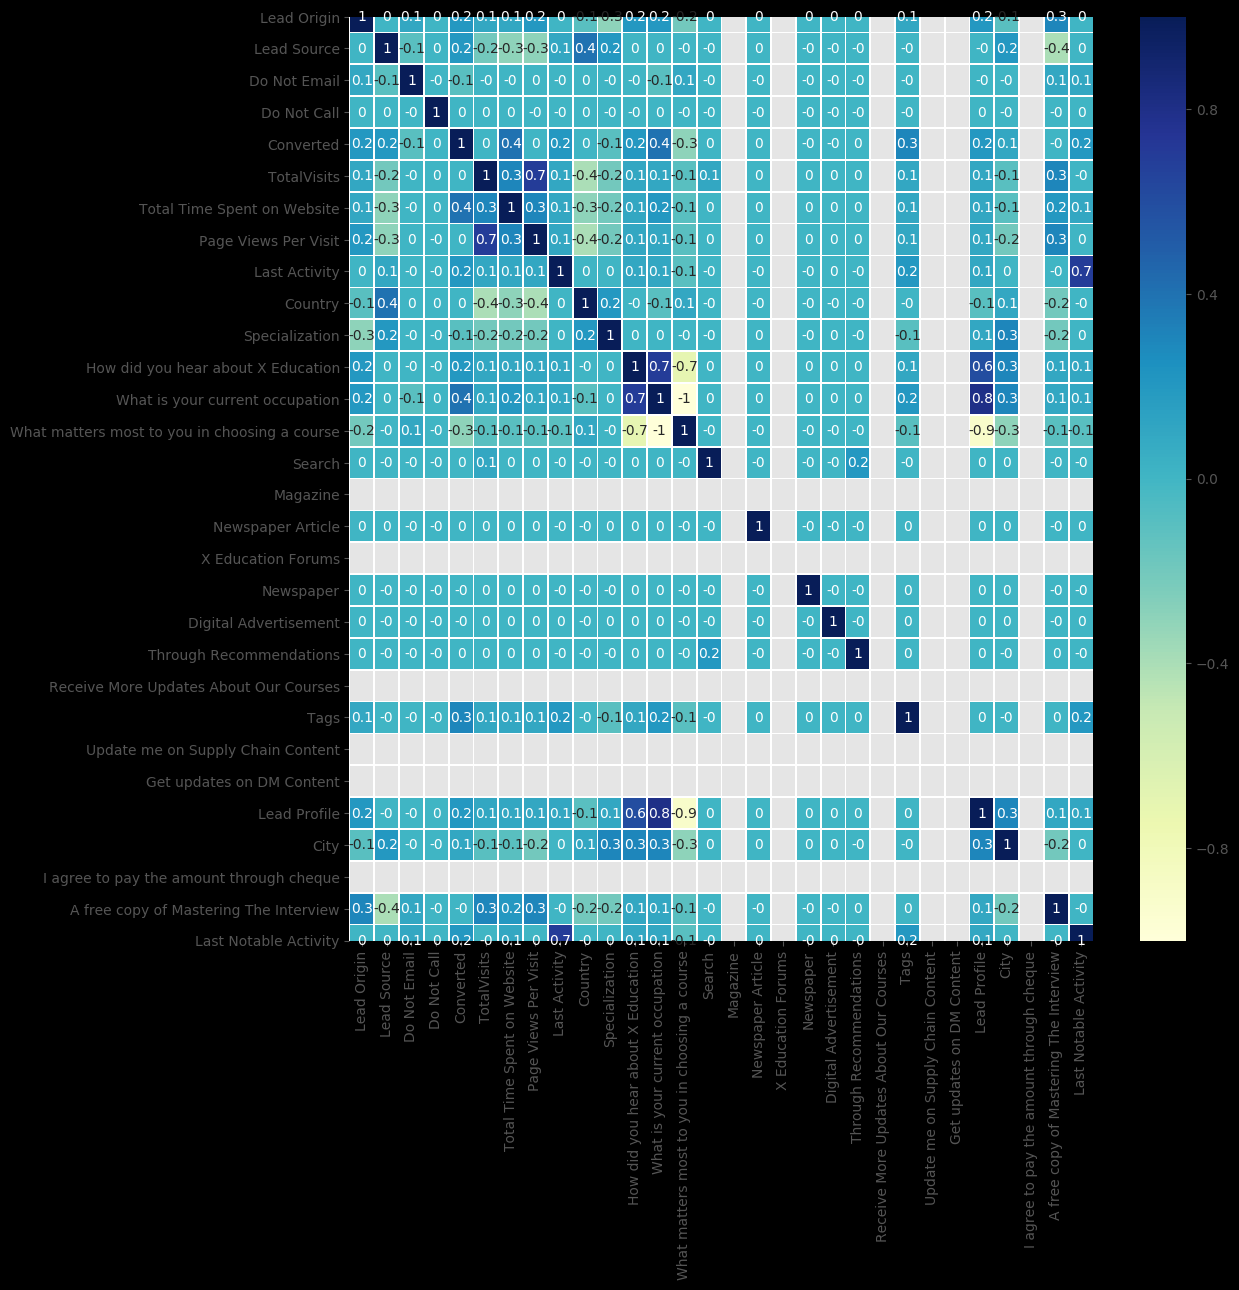

In [355]:
plt.figure(figsize = (12,12))
plt.style.use('ggplot')

# sns.heatmap(df_leads.corr().round(decimals = 1), annot = True, cmap="YlGnBu", linewidths=.5)

sns.heatmap(df_leads.corr().round(decimals = 1), annot = True, cmap="YlGnBu", linewidths=.5)

In [356]:
# Checking non-contributing features
for x in ['Magazine',
'X Education Forums',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque']:
  print('-------------------------')
  print(x)
  print(df_leads[x].value_counts())

-------------------------
Magazine
0    8991
Name: Magazine, dtype: int64
-------------------------
X Education Forums
0    8991
Name: X Education Forums, dtype: int64
-------------------------
Receive More Updates About Our Courses
0    8991
Name: Receive More Updates About Our Courses, dtype: int64
-------------------------
Update me on Supply Chain Content
0    8991
Name: Update me on Supply Chain Content, dtype: int64
-------------------------
Get updates on DM Content
0    8991
Name: Get updates on DM Content, dtype: int64
-------------------------
I agree to pay the amount through cheque
0    8991
Name: I agree to pay the amount through cheque, dtype: int64


From above columns value variance, very clear that above columns having only one value, which doesn't contribute anything for modeling perfection. So, removing the same.

In [357]:
df_leads = df_leads.drop(['Magazine',
'X Education Forums',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque'], axis = 1)


df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,0,6,0,0,0,0.0,0,0.0,10,19,16,7,5,0,0,0,0,0,0,8,5,5,0,8
1,0,7,0,0,0,5.0,674,2.5,5,12,16,7,5,0,0,0,0,0,0,15,5,5,0,4
2,1,1,0,0,1,2.0,1532,2.0,5,12,1,7,4,0,0,0,0,0,0,20,4,0,1,4
3,1,1,0,0,0,1.0,305,1.0,13,12,11,10,5,0,0,0,0,0,0,15,5,0,0,8
4,1,3,0,0,1,2.0,1428,1.0,1,12,16,5,5,0,0,0,0,0,0,20,5,0,0,8


# Train-Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Taking out dependable feature
y = df_leads.pop('Converted')

In [360]:
X = df_leads
X.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,0,6,0,0,0.0,0,0.0,10,19,16,7,5,0,0,0,0,0,0,8,5,5,0,8
1,0,7,0,0,5.0,674,2.5,5,12,16,7,5,0,0,0,0,0,0,15,5,5,0,4
2,1,1,0,0,2.0,1532,2.0,5,12,1,7,4,0,0,0,0,0,0,20,4,0,1,4
3,1,1,0,0,1.0,305,1.0,13,12,11,10,5,0,0,0,0,0,0,15,5,0,0,8
4,1,3,0,0,2.0,1428,1.0,1,12,16,5,5,0,0,0,0,0,0,20,5,0,0,8


In [0]:
# Test - Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 85)

# Feature Standardisation

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# Initiating the scaller
scaler = StandardScaler()

In [364]:
# Applying scaler over Train set
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
X_train[X_train.columns] = scaler.fit_transform(X_train)

In [366]:
X_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
89,0.522760,0.954860,-0.296533,-0.017225,-0.407516,1.100593,-0.168218,-1.834968,-0.524001,0.910428,0.582427,0.580591,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-0.838996,0.863185,0.274595,1.475183,0.103888
377,-1.115237,0.954860,-0.296533,-0.017225,-0.072368,2.107655,-0.411633,0.630302,-0.524001,0.333254,-1.283497,-1.503663,1.546423,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-0.189622,-1.366305,-0.595516,-0.677882,0.732153
1949,-1.115237,0.618622,-0.296533,-0.017225,-1.077812,-0.882461,-1.141876,1.178140,1.133954,0.333254,-1.283497,-1.503663,1.546423,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-0.189622,-1.366305,-0.595516,-0.677882,0.103888
7555,0.522760,0.954860,-0.296533,-0.017225,1.938520,-0.599168,-0.411633,-0.739293,-0.524001,-1.783050,0.582427,0.580591,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-1.488370,0.863185,-1.030571,1.475183,-1.152642
7488,-1.115237,-0.390092,3.372310,-0.017225,-0.407516,-0.725279,-0.655047,0.356383,-0.524001,1.102819,0.582427,0.580591,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-2.137744,1.606348,1.144706,-0.677882,0.103888


In [367]:
print('Successful Conversion Rate:\n=========================\n{}%'.format(round(sum(y)/len(y)*100, 3)))

Successful Conversion Rate:
37.804%


# Logistic Regression Using PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
# Initiating PCA with random_state
pca = PCA(random_state = 85)

In [370]:
# running PCA over Train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=85,
    svd_solver='auto', tol=0.0, whiten=False)

In [371]:
pca.components_

array([[-1.81627308e-01,  6.06116714e-02,  2.25890721e-02,
        -2.77317868e-03, -1.54832553e-01, -1.67675136e-01,
        -1.59603100e-01, -1.03281606e-01,  1.24949072e-01,
         5.26095473e-02, -3.84882665e-01, -4.74064173e-01,
         4.79211530e-01, -1.16951864e-02, -1.06163800e-02,
        -1.00865576e-02, -1.29805508e-02, -2.38603003e-02,
        -1.08435819e-01, -4.43974056e-01, -1.34003924e-01,
        -1.21842608e-01, -1.04562197e-01],
       [ 1.29445924e-01, -3.27995827e-01,  4.08282338e-02,
        -1.05297284e-03,  3.96701555e-01,  2.72404681e-01,
         4.07282194e-01, -1.74006636e-02, -3.42371201e-01,
        -2.89508783e-01, -1.39042588e-01, -1.49743423e-01,
         1.54541376e-01,  2.62837222e-02,  6.54640128e-03,
         1.12227183e-02,  6.79734060e-03,  2.28753698e-02,
         4.01051591e-02, -1.59923461e-01, -2.97720638e-01,
         3.01897732e-01, -3.42229023e-02],
       [ 1.10063487e-02,  9.31085749e-02,  6.29865462e-02,
        -1.82704278e-03,  6.7

In [372]:
# Variance Ratio depicted as
pca.explained_variance_ratio_

array([0.16043293, 0.12852886, 0.07813976, 0.05988652, 0.05471398,
       0.04618738, 0.04423854, 0.04359598, 0.0434954 , 0.04337195,
       0.04105986, 0.03984937, 0.0321291 , 0.0312235 , 0.02979561,
       0.02878036, 0.02591492, 0.0203937 , 0.01894207, 0.01130907,
       0.0099641 , 0.00677797, 0.00126908])

## Scree plot showing Explained Variance

In [0]:
cumsum = list(np.cumsum(pca.explained_variance_ratio_))

# Inserting Dummy value at Zero'th location
cumsum.insert(0, 0.00)

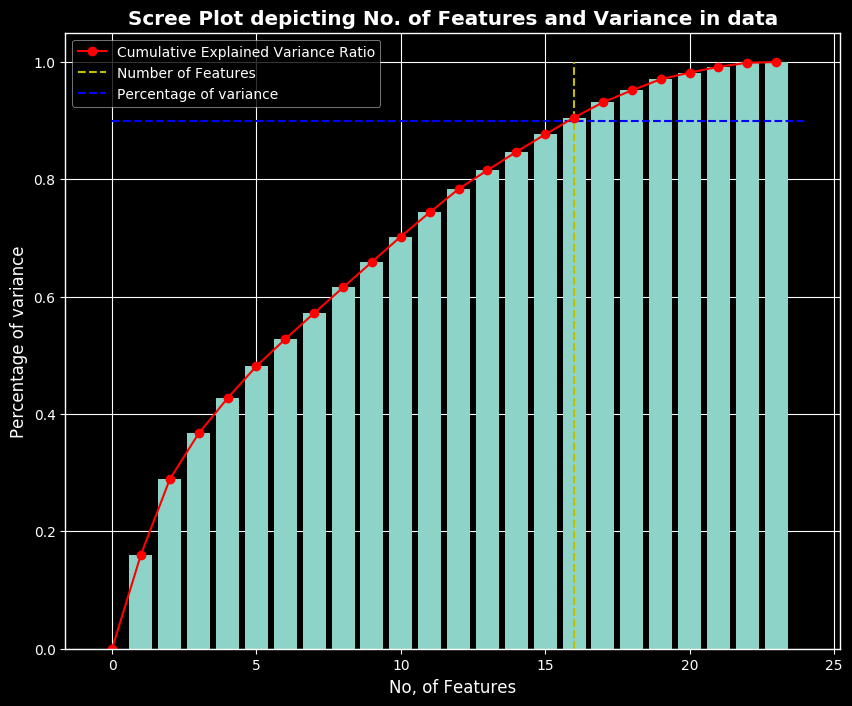

In [374]:
plt.style.use('dark_background')
plt.figure(figsize = (10, 8))
plt.plot(cumsum, 'r-o', label = 'Cumulative Explained Variance Ratio' )
# plt.bar(range(0, len(np.cumsum(pca.explained_variance_ratio_))), np.cumsum(pca.explained_variance_ratio_))
plt.bar(range(0, len(cumsum)), cumsum)

plt.vlines(x = 16, ymax = 1, colors = 'y', label = 'Number of Features', linestyles='--', ymin= 0)
plt.hlines(y = 0.90, xmin = 0, xmax = len(cumsum), label = 'Percentage of variance', linestyles= '--', colors= 'b')
plt.xlabel('No, of Features')
plt.ylabel("Percentage of variance")
plt.title('Scree Plot depicting No. of Features and Variance in data', fontweight='bold')
plt.legend()

From above plot:
1. Features are contributing equal amount of variance in data
2. That is why, we are having gradual increasing curve
3. Considering, 16 features are showing 90% of data variance.
4. Finally considering 16 features for analysis.

## PCA with 16 components

In [0]:
from sklearn.decomposition import IncrementalPCA

In [0]:
# Considering final 16 features as components to represent the data
pca_final = IncrementalPCA(n_components= 16)

In [0]:
# Fitting Train data over PCA to basis
df_train_pca = pca_final.fit_transform(X_train)

In [378]:
df_train_pca.shape

(6743, 16)

In [379]:
# Plotting Correlation matrix
cormat = np.corrcoef(df_train_pca.transpose())
cormat.shape

(16, 16)

Text(0.5, 1, 'PCAed column correlation plot')

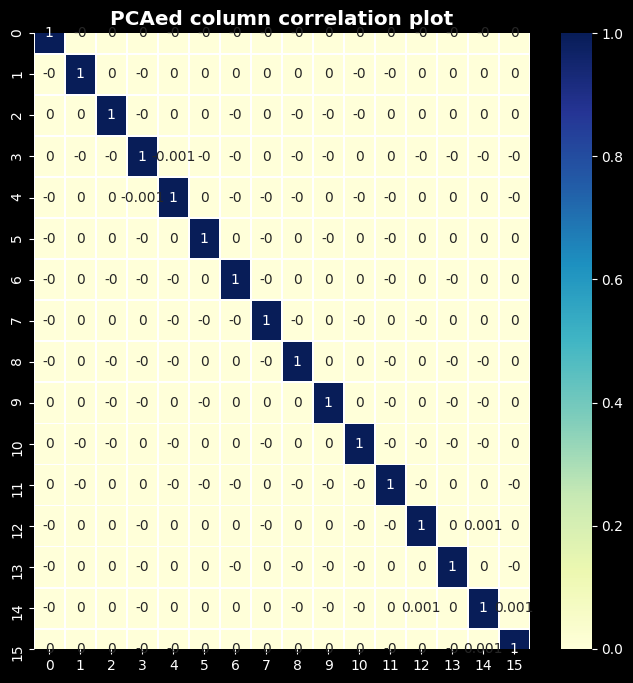

In [380]:
plt.style.use('dark_background')
plt.figure(figsize = (8, 8))
sns.heatmap(cormat.round(decimals = 3), annot = True, cmap="YlGnBu", linewidths=.5)
plt.title('PCAed column correlation plot', fontweight='bold')

Above heatplot, clearly identifies that new basis of features are clearly having no inter-dependency on other features.

In [381]:
df_train_pca

array([[-1.29303897, -0.32113128, -1.60852926, ...,  0.91932124,
         1.19558863, -1.24024752],
       [ 2.52683916,  0.7796909 ,  1.55734766, ...,  0.80790916,
         1.61630942, -0.60822509],
       [ 3.49603543, -1.17706839,  1.35967562, ..., -0.46603217,
         0.11880269,  0.25437401],
       ...,
       [-0.28811038, -3.19663014, -0.13497111, ..., -0.13534553,
        -0.03919117,  0.4529641 ],
       [-0.45780569,  1.21965415, -1.20093815, ...,  0.18318689,
         1.4760055 , -0.51135885],
       [-0.46995574, -1.19607467,  0.46871012, ..., -0.11583137,
        -1.1516377 , -0.24678076]])

In [0]:
# Constructing DataFrame on trained_PCA data
df_train_pca_ACT = pd.DataFrame(df_train_pca)
df_train_pca_ACT.columns = ["PC_{}".format(x) for x in df_train_pca_ACT.columns]

In [383]:
df_train_pca_ACT.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15
0,-1.293039,-0.321131,-1.608529,0.127471,-0.237125,0.314574,0.104628,0.099450,-0.030092,-0.014088,0.187473,-0.510809,0.717476,0.919321,1.195589,-1.240248
1,2.526839,0.779691,1.557348,-1.386035,-0.463178,-0.574543,-0.460177,0.095362,-0.107342,-0.190877,-0.222171,0.021680,-0.723173,0.807909,1.616309,-0.608225
2,3.496035,-1.177068,1.359676,0.054256,0.150549,-0.207831,-0.285431,0.020716,0.005554,-0.133801,-0.253120,-0.471717,0.072404,-0.466032,0.118803,0.254374
3,-1.211512,1.214510,-1.919348,1.317658,0.436840,-0.066855,0.430066,0.237472,-0.056063,0.009247,1.221613,-1.407145,-0.573958,-0.598185,-0.061022,0.398407
4,-0.870804,-1.812224,-0.457794,-0.786788,-0.974128,3.852755,0.890623,0.165015,-0.524885,1.189205,-0.161088,0.252196,-1.176052,-0.015281,-0.275615,-0.009287


## Applying Logistic Regression over PCAed data

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [0]:
# Running LogisticRegression on PCA data
log_1 = LogisticRegression()
model_1 = log_1.fit(df_train_pca, y_train)

In [0]:
# Predicting Conversion probabilities for train_data
y_train_pred = model_1.predict_proba(df_train_pca)

In [387]:
y_train_pred

array([[0.41660036, 0.58339964],
       [0.26764785, 0.73235215],
       [0.85729708, 0.14270292],
       ...,
       [0.72905677, 0.27094323],
       [0.21671908, 0.78328092],
       [0.65191239, 0.34808761]])

In [388]:
y_train_pred[:,1]

array([0.58339964, 0.73235215, 0.14270292, ..., 0.27094323, 0.78328092,
       0.34808761])

In [389]:
# Constructing Train DataFrame with predicted Probabilities
df_pca_train_pred_final = pd.DataFrame(y_train_pred[:,1], columns = ['PCA_train_pred_prob'])
df_pca_train_pred_final.head()

,PCA_train_pred_prob
0,0.583400
1,0.732352
2,0.142703
3,0.148435
4,0.021602


In [0]:
# Changing the index to match with Train DataSet
df_pca_train_pred_final.index = X_train.index

In [391]:
# Adding Converted Column
df_pca_train_pred_final['Converted'] = y[X_train.index]
df_pca_train_pred_final.head()

,PCA_train_pred_prob,Converted
89,0.583400,0
377,0.732352,1
1949,0.142703,1
7555,0.148435,0
7488,0.021602,0


In [0]:
# ROC CURVE FUNCTION CALL

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'w--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

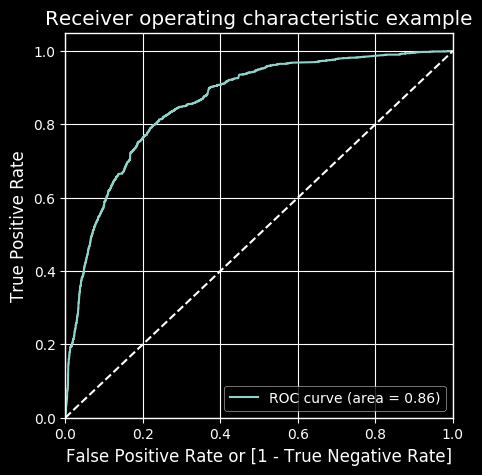

In [393]:
# Checking for the ROC curve for PCAed data

draw_roc(df_pca_train_pred_final.Converted, df_pca_train_pred_final.PCA_train_pred_prob)

In [394]:
# finding the roc_auc_score
metrics.roc_auc_score(y_train, y_train_pred[:,1])

0.858194174713703

As per above value, we are concluding, False Positive Rate is very less and True Positive Rate is very high such that we are having a good amound of AUC value as **85.8%**

### Finding Optimal Cutoff prob threshold for Train Data values

In [395]:
# Lets create columns with different probability CutOffs
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
  df_pca_train_pred_final[i] = df_pca_train_pred_final.PCA_train_pred_prob.map(lambda x : 1 if x > i else 0)

df_pca_train_pred_final.head()

,PCA_train_pred_prob,Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
89,0.583400,0,1,1,1,1,1,1,0,0,0,0
377,0.732352,1,1,1,1,1,1,1,1,1,0,0
1949,0.142703,1,1,1,0,0,0,0,0,0,0,0
7555,0.148435,0,1,1,0,0,0,0,0,0,0,0
7488,0.021602,0,1,0,0,0,0,0,0,0,0,0


In [396]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(df_pca_train_pred_final.Converted, df_pca_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378318  1.000000  0.000000
0.1   0.1  0.562361  0.976088  0.310592
0.2   0.2  0.714519  0.910231  0.595420
0.3   0.3  0.767907  0.831047  0.729485
0.4   0.4  0.787335  0.753038  0.808206
0.5   0.5  0.787780  0.660133  0.865458
0.6   0.6  0.776509  0.559388  0.908635
0.7   0.7  0.757675  0.457860  0.940124
0.8   0.8  0.721489  0.321835  0.964695
0.9   0.9  0.673884  0.152489  0.991174


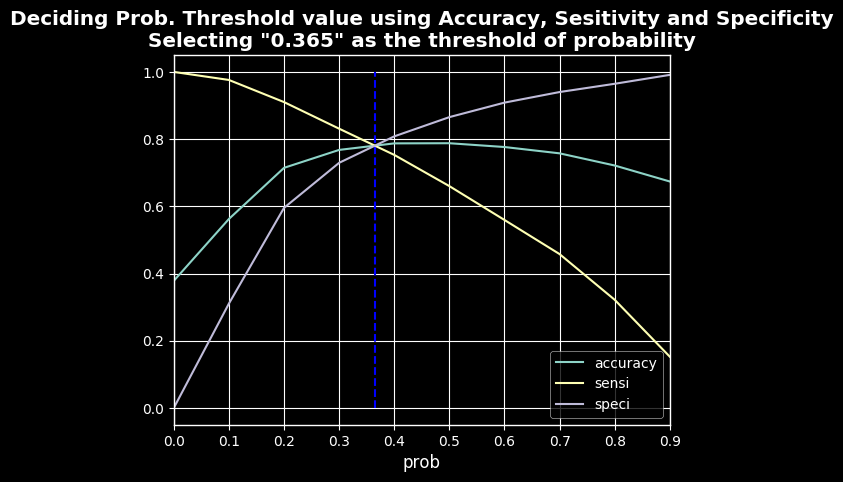

In [397]:
cutoff_df.plot.line(x='prob', y= ['accuracy', 'sensi', 'speci'])
plt.vlines(0.365, ymin = 0, ymax= 1, linestyles= '--', colors = 'b')
plt.title('Deciding Prob. Threshold value using Accuracy, Sesitivity and Specificity\nSelecting "0.365" as the threshold of probability', fontweight='bold')
plt.show()

In [398]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.365 else 0
df_pca_train_pred_final['predicted'] = df_pca_train_pred_final.PCA_train_pred_prob.map(lambda x: 1 if x >= 0.365 else 0)
df_pca_train_pred_final.head()

,PCA_train_pred_prob,Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
89,0.583400,0,1,1,1,1,1,1,0,0,0,0,1
377,0.732352,1,1,1,1,1,1,1,1,1,0,0,1
1949,0.142703,1,1,1,0,0,0,0,0,0,0,0,0
7555,0.148435,0,1,1,0,0,0,0,0,0,0,0,0
7488,0.021602,0,1,0,0,0,0,0,0,0,0,0,0


### Finding Precision and Recall Score

In [0]:
from sklearn.metrics import precision_score, recall_score

In [400]:
# Precision Score
precision_score(df_pca_train_pred_final.Converted, df_pca_train_pred_final.predicted)

0.687801516195727

In [401]:
# Recall Score
recall_score(df_pca_train_pred_final.Converted, df_pca_train_pred_final.predicted)

0.782438259506076

## In Order to increase the Preprecision score we have to increase the probability of threshold value too.
Considering with 0.56 and checking the Precision value.

In [482]:
df_pca_train_pred_final['predicted_2'] = df_pca_train_pred_final.PCA_train_pred_prob.map(lambda x: 1 if x >= 0.7 else 0)
df_pca_train_pred_final.head()

,PCA_train_pred_prob,Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,predicted_2
89,0.583400,0,1,1,1,1,1,1,0,0,0,0,1,0
377,0.732352,1,1,1,1,1,1,1,1,1,0,0,1,1
1949,0.142703,1,1,1,0,0,0,0,0,0,0,0,0,0
7555,0.148435,0,1,1,0,0,0,0,0,0,0,0,0,0
7488,0.021602,0,1,0,0,0,0,0,0,0,0,0,0,0


In [483]:
# Precision Score
precision_score(df_pca_train_pred_final.Converted, df_pca_train_pred_final.predicted_2)

0.8231148696264975

In [484]:
# Recall Score
recall_score(df_pca_train_pred_final.Converted, df_pca_train_pred_final.predicted_2)

0.457859662877303

### Precision and Recall Curve

In [0]:
from sklearn.metrics import precision_recall_curve

In [0]:
# Finding precision, recall at different threshold
p, r, thresholds = precision_recall_curve(df_pca_train_pred_final.Converted, df_pca_train_pred_final.PCA_train_pred_prob)

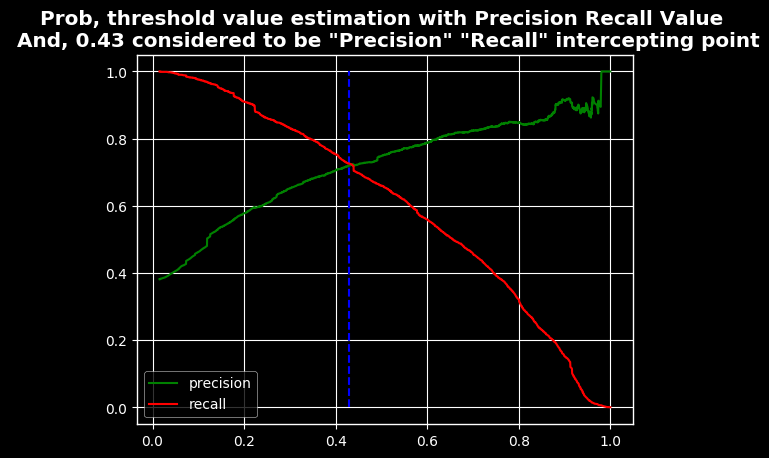

In [404]:
plt.plot(thresholds, p[:-1], 'g-', label = 'precision')
plt.plot(thresholds, r[:-1], 'r-', label = 'recall')
plt.vlines(0.43, ymin = 0, ymax= 1, linestyles= '--', colors = 'b')
plt.title('Prob, threshold value estimation with Precision Recall Value \n And, 0.43 considered to be "Precision" "Recall" intercepting point', fontweight='bold')
plt.legend()

Decision on Probability Threshold confirmation:
1. Using Accuracy, Sensitivity and Specificity method, we are having 0.365 as probability threshold 
2. Whereas using, Precision & Recall method, we have 0.43 as probability threshold for Conversion analysis.

**Finally, we are considering 0.365 as the probaility of threshold for further analysis.**

### Applying PCA on Test Data 

Before applying PCA on Test data, scalling the test data

In [0]:
# Applying Scaler on X_test too
X_test[X_test.columns] = scaler.transform(X_test)

In [0]:
# Applying PCA_model on the test data too
df_test_pca = pca_final.transform(X_test)

In [407]:
df_test_pca.shape

(2248, 16)

In [0]:
# Applying PCA on test data too.
df_test_pca = pca_final.transform(X_test)

In [409]:
df_test_pca

array([[-1.31235456, -0.56355607, -1.62375344, ..., -0.64152266,
        -0.56224677, -0.68691484],
       [-1.51886713,  0.25816984,  1.82416195, ..., -0.53556242,
        -0.87666694, -0.57160786],
       [-1.20265783,  0.41438021, -2.34369703, ..., -0.53790538,
         0.20519565, -0.63047035],
       ...,
       [-0.66456426, -2.05792991, -1.27466577, ...,  0.29720594,
        -0.13527317, -0.68165498],
       [-2.19605519,  0.52842963,  1.58881125, ...,  0.80293064,
         0.82430381, -0.88609016],
       [ 0.45226993, -2.23280997,  0.5378193 , ..., -1.79563896,
         0.36189171, -0.20886782]])

In [0]:
# Using regression model built on PCAed_train data
# predicting probabilities on test_data
pred_probs_test = model_1.predict_proba(df_test_pca)

In [411]:
pred_probs_test

array([[0.76279349, 0.23720651],
       [0.51588575, 0.48411425],
       [0.92842056, 0.07157944],
       ...,
       [0.57381518, 0.42618482],
       [0.1102587 , 0.8897413 ],
       [0.60365181, 0.39634819]])

In [412]:
# finding the roc_auc_score
metrics.roc_auc_score(y_test, pred_probs_test[:,1])

0.866484164420485

In [413]:
# Constructing dataFrame with probabilities
df_pca_test_pred_final = pd.DataFrame(pred_probs_test[:,1], columns = ['PCA_test_pred_prob'])
df_pca_test_pred_final.head()

,PCA_test_pred_prob
0,0.237207
1,0.484114
2,0.071579
3,0.090057
4,0.222272


In [414]:
# Changing the indexes to match with Test data
df_pca_test_pred_final.index = y_test.index
df_pca_test_pred_final.head()

,PCA_test_pred_prob
6224,0.237207
1581,0.484114
5008,0.071579
7028,0.090057
6350,0.222272


In [415]:
# Adding converted column from user data
df_pca_test_pred_final['Converted'] = y[y_test.index]
df_pca_test_pred_final.head()

,PCA_test_pred_prob,Converted
6224,0.237207,0
1581,0.484114,1
5008,0.071579,0
7028,0.090057,0
6350,0.222272,0


In [416]:
# Making the predictions based on the cutoff point
df_pca_test_pred_final['final_prediction'] = df_pca_test_pred_final.PCA_test_pred_prob.map(lambda x : 1 if x > 0.365 else 0)
df_pca_test_pred_final.head()

,PCA_test_pred_prob,Converted,final_prediction
6224,0.237207,0,0
1581,0.484114,1,1
5008,0.071579,0,0
7028,0.090057,0,0
6350,0.222272,0,0


Accuracy Score For Test Data

In [417]:
# Accuracy Score for Test Data
metrics.accuracy_score(df_pca_test_pred_final.Converted, df_pca_test_pred_final.final_prediction)

0.7873665480427047

Precision Score


In [418]:
# 'Precision Score' for Test Data
metrics.precision_score(df_pca_test_pred_final.Converted, df_pca_test_pred_final.final_prediction)

0.6903292181069959

Recall score

In [419]:
# 'Recall Score' for Test Data
metrics.recall_score(df_pca_test_pred_final.Converted, df_pca_test_pred_final.final_prediction)

0.7912735849056604



---



# Logistic Regression Without PCA

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [421]:
X_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
89,0.522760,0.954860,-0.296533,-0.017225,-0.407516,1.100593,-0.168218,-1.834968,-0.524001,0.910428,0.582427,0.580591,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-0.838996,0.863185,0.274595,1.475183,0.103888
377,-1.115237,0.954860,-0.296533,-0.017225,-0.072368,2.107655,-0.411633,0.630302,-0.524001,0.333254,-1.283497,-1.503663,1.546423,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-0.189622,-1.366305,-0.595516,-0.677882,0.732153
1949,-1.115237,0.618622,-0.296533,-0.017225,-1.077812,-0.882461,-1.141876,1.178140,1.133954,0.333254,-1.283497,-1.503663,1.546423,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-0.189622,-1.366305,-0.595516,-0.677882,0.103888
7555,0.522760,0.954860,-0.296533,-0.017225,1.938520,-0.599168,-0.411633,-0.739293,-0.524001,-1.783050,0.582427,0.580591,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-1.488370,0.863185,-1.030571,1.475183,-1.152642
7488,-1.115237,-0.390092,3.372310,-0.017225,-0.407516,-0.725279,-0.655047,0.356383,-0.524001,1.102819,0.582427,0.580591,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-2.137744,1.606348,1.144706,-0.677882,0.103888


In [422]:
X_test.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
6224,0.522760,-1.062568,-0.296533,-0.017225,-0.407516,-0.493161,-0.168218,-0.739293,-0.524001,0.525645,1.515388,0.580591,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,0.297409,0.863185,-0.160460,-0.677882,-1.152642
1581,0.522760,-0.390092,-0.296533,-0.017225,0.933076,-0.423709,1.779096,1.178140,-0.524001,1.487602,-0.817016,0.580591,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,1.109127,0.863185,0.709651,-0.677882,1.360418
5008,0.522760,-1.062568,-0.296533,-0.017225,-0.407516,-0.385327,-0.168218,-0.739293,-0.524001,0.140862,0.582427,1.275342,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-2.137744,0.863185,-1.030571,1.475183,-1.152642
7028,-1.115237,-0.390092,-0.296533,-0.017225,0.597928,-0.621100,0.075196,0.630302,-0.524001,1.102819,0.582427,-0.114161,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-2.137744,1.606348,1.144706,-0.677882,0.732153
6350,0.522760,0.954860,-0.296533,-0.017225,2.943964,0.488313,0.318610,-0.739293,-0.524001,-1.205877,-1.283497,-1.503663,1.546423,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-0.189622,-1.366305,1.579762,1.475183,-1.152642


### Applying RFE to work on important features only

In [0]:
# Applying Logistic Regression on Train data
logreg = LogisticRegression()
rfe = RFE(logreg, 12)     # Considering 12 features for analysis
rfe = rfe.fit(X_train, y_train)

In [424]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False False  True  True  True False False False  True
  True False False False False False  True  True False  True  True]
[ 1  1  1  5  2  1  1  1  3  7  9  1  1 11  6  4 12 10  1  1  8  1  1]


In [425]:
# Showing list of columns selected and their corresponding rankings
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 5),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Country', False, 3),
 ('Specialization', False, 7),
 ('How did you hear about X Education', False, 9),
 ('What is your current occupation', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Search', False, 11),
 ('Newspaper Article', False, 6),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 12),
 ('Through Recommendations', False, 10),
 ('Tags', True, 1),
 ('Lead Profile', True, 1),
 ('City', False, 8),
 ('A free copy of Mastering The Interview', True, 1),
 ('Last Notable Activity', True, 1)]

In [426]:
# Showing list of columns selected by RFE
cols_selected = X_train.columns[rfe.support_]
print(cols_selected)

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


## Assessing the model with selected columns

In [0]:
import statsmodels.api as sm

In [428]:
# Applying Logistic Regression on selected columns itself
X_train_sm = sm.add_constant(X_train[cols_selected])
logm_RFE = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm_RFE.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6743
Model:                            GLM   Df Residuals:                     6730
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2961.4
Date:                Mon, 18 Nov 2019   Deviance:                       5922.8
Time:                        12:51:47   Pearson chi2:                 7.04e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7299      0.034    -21.433      0.000      -0.797      -0.663
Lead Origin                                       0.3450      0.035      9.767      0.000       0.276       0.414
Lead Source                                       0.5332      0.037     14.452      0.000       0.461       0.605
Do Not Email                                     -0.3848      0.041     -9.441      0.000      -0.465      -0.305
Total Time Spent on Website                       1.0560      0.037     28.545      0.000       0.983       1.128
Page Views Per Visit                             -0.3692      0.038     -9.812      0.000      -0.443      -0.295
Last Activity                                     0.3980      0.054      7.402      0.000       0.293       0.503
What is your current occupation                   1.0470      0.135      7.757      0.000       0.782       1.312
What matters most to you in choosing a course    -0.3865      0.149     -2.587      0.010      -0.679      -0.094
Tags                                              0.3696      0.033     11.166      0.000       0.305       0.435
Lead Profile                                     -0.8613      0.072    -11.997      0.000      -1.002      -0.721
A free copy of Mastering The Interview           -0.1378      0.037     -3.722      0.000      -0.210      -0.065
Last Notable Activity                             0.1315      0.052      2.532      0.011       0.030       0.233
=================================================================================================================
"""

Getting the VIF Values for selected columns

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [430]:
# Creating the dataframe having features with VIFs for each feature
vif = pd.DataFrame()
vif['features'] = X_train[cols_selected].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_selected].values, i) for i in range(X_train[cols_selected].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
7,What matters most to you in choosing a course,20.08
6,What is your current occupation,15.36
9,Lead Profile,4.78
5,Last Activity,2.42
11,Last Notable Activity,2.40
10,A free copy of Mastering The Interview,1.33
1,Lead Source,1.27
4,Page Views Per Visit,1.24
0,Lead Origin,1.23
3,Total Time Spent on Website,1.23


From above, clearly indiciating the feature named "What matters most to you in choosing a course" has inter-dependency/collinearity with other features; so, no point in selected the same.

In [431]:
# Dropping 'What matters most to you in choosing a course'
cols_selected = cols_selected.drop('What matters most to you in choosing a course', 1)
cols_selected

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Tags', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [432]:
#running the model again after removing the high VIF column
X_train_sm = sm.add_constant(X_train[cols_selected])
logm_RFE = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm_RFE.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6743
Model:                            GLM   Df Residuals:                     6731
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2964.6
Date:                Mon, 18 Nov 2019   Deviance:                       5929.3
Time:                        12:51:47   Pearson chi2:                 7.59e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.7230      0.034    -21.367      0.000      -0.789      -0.657
Lead Origin                                0.3475      0.035      9.832      0.000       0.278       0.417
Lead Source                                0.5339      0.037     14.472      0.000       0.462       0.606
Do Not Email                              -0.3863      0.041     -9.478      0.000      -0.466      -0.306
Total Time Spent on Website                1.0531      0.037     28.510      0.000       0.981       1.125
Page Views Per Visit                      -0.3673      0.038     -9.765      0.000      -0.441      -0.294
Last Activity                              0.3945      0.054      7.348      0.000       0.289       0.500
What is your current occupation            1.3558      0.068     20.006      0.000       1.223       1.489
Tags                                       0.3714      0.033     11.200      0.000       0.306       0.436
Lead Profile                              -0.7844      0.065    -12.054      0.000      -0.912      -0.657
A free copy of Mastering The Interview    -0.1364      0.037     -3.689      0.000      -0.209      -0.064
Last Notable Activity                      0.1280      0.052      2.467      0.014       0.026       0.230
==========================================================================================================
"""

In [433]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[cols_selected].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_selected].values, i) for i in range(X_train[cols_selected].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation,3.80
8,Lead Profile,3.56
5,Last Activity,2.41
10,Last Notable Activity,2.39
9,A free copy of Mastering The Interview,1.33
1,Lead Source,1.27
4,Page Views Per Visit,1.24
0,Lead Origin,1.23
3,Total Time Spent on Website,1.23
7,Tags,1.12


From VIF values, we are having features which having not much collinearity with others. So, finalising the columns to work with.

In [0]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [0]:
y_train_pred = y_train_pred.values.reshape(-1)

In [436]:
y_train_pred[:10]

array([0.54744888, 0.78279442, 0.16214365, 0.18543954, 0.01529344,
       0.12584796, 0.44433647, 0.13280609, 0.04443417, 0.98083387])

In [437]:
X_train_sm.index

Int64Index([  89,  377, 1949, 7555, 7488, 6248, 6688,  698, 7568, 7963,
            ...
            9044, 3073, 1505, 6123, 1019, 1641, 5881, 6907, 1655, 4590],
           dtype='int64', length=6743)

In [0]:
# Creating DataFrame with predicted values
y_train_pred_final = pd.DataFrame({'Converted': y[X_train_sm.index], 'Converted_prob': y_train_pred})
y_train_pred_final['Lead Number'] = leadNumber.loc[X_train_sm.index]

In [439]:
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
89,0,0.547449,659630
377,1,0.782794,656469
1949,1,0.162144,640752
7555,0,0.185440,591682
7488,0,0.015293,592207


## Plotting the ROC Curve

In [0]:
from sklearn import metrics

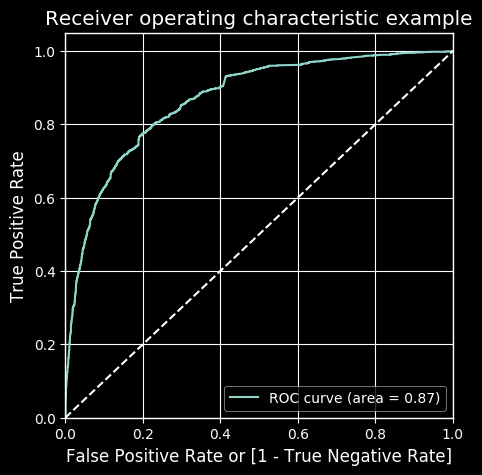

In [441]:
# Calling the function and plotting the curve to see the model behavior

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob) # ===> Giving "ACUTAL" churn values with Probabilities of CHURN values

Having a very high ROC curve expressing Low False Positive Rate and high True Positive Rate is good signal for proceeding further.

### Finding the Optimal Cutoff Point

In [442]:
# Lets create columns with different probability CutOffs
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
  y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
89,0,0.547449,659630,1,1,1,1,1,1,0,0,0,0
377,1,0.782794,656469,1,1,1,1,1,1,1,1,0,0
1949,1,0.162144,640752,1,1,0,0,0,0,0,0,0,0
7555,0,0.185440,591682,1,1,0,0,0,0,0,0,0,0
7488,0,0.015293,592207,1,0,0,0,0,0,0,0,0,0


In [443]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378318  1.000000  0.000000
0.1   0.1  0.582530  0.971776  0.345658
0.2   0.2  0.723269  0.896511  0.617844
0.3   0.3  0.767018  0.820855  0.734256
0.4   0.4  0.790746  0.757350  0.811069
0.5   0.5  0.800682  0.680125  0.874046
0.6   0.6  0.793712  0.589181  0.918177
0.7   0.7  0.773691  0.488436  0.947281
0.8   0.8  0.744327  0.372011  0.970897
0.9   0.9  0.683820  0.180321  0.990219


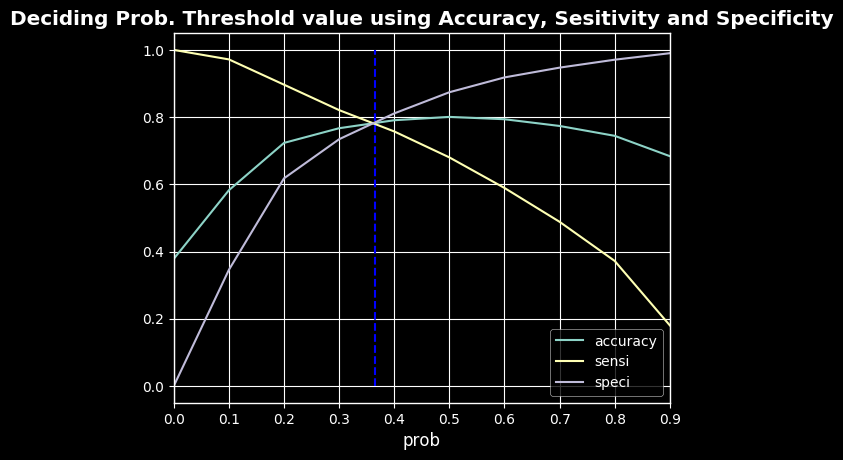

In [444]:
cutoff_df.plot.line(x='prob', y= ['accuracy', 'sensi', 'speci'])
plt.vlines(0.365, ymin = 0, ymax= 1, linestyles= '--', colors = 'b')
plt.title('Deciding Prob. Threshold value using Accuracy, Sesitivity and Specificity', fontweight='bold')
plt.show()

In [0]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.365 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x >= 0.365 else 0)

In [446]:
# Final y_train_predicted df
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
89,0,0.547449,659630,1,1,1,1,1,1,0,0,0,0,1
377,1,0.782794,656469,1,1,1,1,1,1,1,1,0,0,1
1949,1,0.162144,640752,1,1,0,0,0,0,0,0,0,0,0
7555,0,0.185440,591682,1,1,0,0,0,0,0,0,0,0,0
7488,0,0.015293,592207,1,0,0,0,0,0,0,0,0,0,0


### Finding Precision and Recall score

In [0]:
from sklearn.metrics import precision_score, recall_score

In [448]:
# Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6922544951590595

In [449]:
# Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7847902783222266

## In order to increase the Precision score, we could raise the probability threshold again.
Choosing 0.56 to start with to check increase in precision.

In [485]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.365 else 0
y_train_pred_final['predicted_2'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x >= 0.56 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,predicted_2
89,0,0.547449,659630,1,1,1,1,1,1,0,0,0,0,1,0
377,1,0.782794,656469,1,1,1,1,1,1,1,1,0,0,1,1
1949,1,0.162144,640752,1,1,0,0,0,0,0,0,0,0,0,0
7555,0,0.185440,591682,1,1,0,0,0,0,0,0,0,0,0,0
7488,0,0.015293,592207,1,0,0,0,0,0,0,0,0,0,0,0


In [486]:
# Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted_2)

0.7943085371942087

In [487]:
# Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted_2)

0.6236769894159153

### Precision Recall Curve

In [0]:
from sklearn.metrics import precision_recall_curve

In [0]:
# Finding precision, recall at different threshold
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

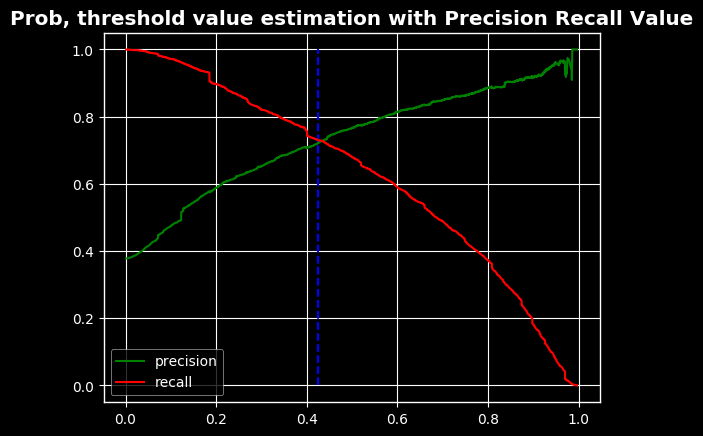

In [452]:
plt.plot(thresholds, p[:-1], 'g-', label = 'precision')
plt.plot(thresholds, r[:-1], 'r-', label = 'recall')
plt.vlines(0.425, ymin = 0, ymax= 1, linestyles= '--', colors = 'b')
plt.title('Prob, threshold value estimation with Precision Recall Value', fontweight='bold')
plt.legend()

From the Precision and Recall plot
1. Probability of threshold value expected to be 0.425

But considering 0.365 as the probability of threshold for making Coversion decisions

### Applying logistic regression on Test data too

In [453]:
X_test.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
6224,0.522760,-1.062568,-0.296533,-0.017225,-0.407516,-0.493161,-0.168218,-0.739293,-0.524001,0.525645,1.515388,0.580591,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,0.297409,0.863185,-0.160460,-0.677882,-1.152642
1581,0.522760,-0.390092,-0.296533,-0.017225,0.933076,-0.423709,1.779096,1.178140,-0.524001,1.487602,-0.817016,0.580591,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,1.109127,0.863185,0.709651,-0.677882,1.360418
5008,0.522760,-1.062568,-0.296533,-0.017225,-0.407516,-0.385327,-0.168218,-0.739293,-0.524001,0.140862,0.582427,1.275342,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-2.137744,0.863185,-1.030571,1.475183,-1.152642
7028,-1.115237,-0.390092,-0.296533,-0.017225,0.597928,-0.621100,0.075196,0.630302,-0.524001,1.102819,0.582427,-0.114161,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-2.137744,1.606348,1.144706,-0.677882,0.732153
6350,0.522760,0.954860,-0.296533,-0.017225,2.943964,0.488313,0.318610,-0.739293,-0.524001,-1.205877,-1.283497,-1.503663,1.546423,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-0.189622,-1.366305,1.579762,1.475183,-1.152642


In [0]:
# # Applying Scaler on X_test too
# X_test[X_test.columns] = scaler.transform(X_test)

In [455]:
X_test.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
6224,0.522760,-1.062568,-0.296533,-0.017225,-0.407516,-0.493161,-0.168218,-0.739293,-0.524001,0.525645,1.515388,0.580591,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,0.297409,0.863185,-0.160460,-0.677882,-1.152642
1581,0.522760,-0.390092,-0.296533,-0.017225,0.933076,-0.423709,1.779096,1.178140,-0.524001,1.487602,-0.817016,0.580591,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,1.109127,0.863185,0.709651,-0.677882,1.360418
5008,0.522760,-1.062568,-0.296533,-0.017225,-0.407516,-0.385327,-0.168218,-0.739293,-0.524001,0.140862,0.582427,1.275342,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-2.137744,0.863185,-1.030571,1.475183,-1.152642
7028,-1.115237,-0.390092,-0.296533,-0.017225,0.597928,-0.621100,0.075196,0.630302,-0.524001,1.102819,0.582427,-0.114161,-0.646308,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-2.137744,1.606348,1.144706,-0.677882,0.732153
6350,0.522760,0.954860,-0.296533,-0.017225,2.943964,0.488313,0.318610,-0.739293,-0.524001,-1.205877,-1.283497,-1.503663,1.546423,-0.040423,-0.012179,-0.012179,-0.017225,-0.027241,-0.189622,-1.366305,1.579762,1.475183,-1.152642


In [0]:
# Not Overwritting X_test columns; needing in next state
# X_test = X_test[cols_selected]

In [457]:
X_test[cols_selected].head()

,Lead Origin,Lead Source,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
6224,0.522760,-1.062568,-0.296533,-0.493161,-0.168218,-0.739293,0.580591,0.297409,0.863185,-0.677882,-1.152642
1581,0.522760,-0.390092,-0.296533,-0.423709,1.779096,1.178140,0.580591,1.109127,0.863185,-0.677882,1.360418
5008,0.522760,-1.062568,-0.296533,-0.385327,-0.168218,-0.739293,1.275342,-2.137744,0.863185,1.475183,-1.152642
7028,-1.115237,-0.390092,-0.296533,-0.621100,0.075196,0.630302,-0.114161,-2.137744,1.606348,-0.677882,0.732153
6350,0.522760,0.954860,-0.296533,0.488313,0.318610,-0.739293,-1.503663,-0.189622,-1.366305,1.475183,-1.152642


In [0]:
# Building logistic Regression on Test_set
X_test_sm = sm.add_constant(X_test[cols_selected])

In [0]:
y_test_pred = res.predict(X_test_sm)

In [460]:
y_test_pred[:10]

6224    0.171101
1581    0.381965
5008    0.151801
7028    0.025094
6350    0.231896
5676    0.606077
450     0.303591
9140    0.098883
6656    0.298130
8654    0.122757
dtype: float64

In [0]:
# Building Data Frame with Prediction Values
y_test_pred_final = pd.DataFrame(y_test_pred, columns = ['converted_pred'])

In [462]:
y_test_pred_final.head()

,converted_pred
6224,0.171101
1581,0.381965
5008,0.151801
7028,0.025094
6350,0.231896


In [0]:
y_test_pred_final['Lead Number'] = leadNumber.loc[X_test.index]


In [0]:
y_test_pred_final['converted'] = y[X_test.index]

In [465]:
y_test_pred_final.head()

,converted_pred,Lead Number,converted
6224,0.171101,601982,0
1581,0.381965,643819,1
5008,0.151801,611849,0
7028,0.025094,595732,0
6350,0.231896,601171,0


In [0]:
# Making the predictions based on the cutoff point
y_test_pred_final['final_prediction'] = y_test_pred_final.converted_pred.map(lambda x : 1 if x > 0.365 else 0)

In [467]:
y_test_pred_final.head()

,converted_pred,Lead Number,converted,final_prediction
6224,0.171101,601982,0,0
1581,0.381965,643819,1,1
5008,0.151801,611849,0,0
7028,0.025094,595732,0,0
6350,0.231896,601171,0,0


In [468]:
# Accuracy Score for Test Data
metrics.accuracy_score(y_test_pred_final.converted, y_test_pred_final.final_prediction)

0.8038256227758007

In [469]:
# 'Precision Score' for Test Data
metrics.precision_score(y_test_pred_final.converted, y_test_pred_final.final_prediction)

0.7135362014690452

In [470]:
# 'Recall Score' for Test Data
metrics.recall_score(y_test_pred_final.converted, y_test_pred_final.final_prediction)

0.8018867924528302

# Showing the relation between Converted to the features of impact

In [0]:
final_cols_selected = list(cols_selected)
final_cols_selected.append("Converted")

In [472]:
final_cols_selected

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'What is your current occupation',
 'Tags',
 'Lead Profile',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'Converted']

In [0]:
# Showing correlation between Converted column and Columns selected for regression
df_leads['Converted'] = y

In [474]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Converted
0,0,6,0,0,0.0,0,0.0,10,19,16,7,5,0,0,0,0,0,0,8,5,5,0,8,0
1,0,7,0,0,5.0,674,2.5,5,12,16,7,5,0,0,0,0,0,0,15,5,5,0,4,0
2,1,1,0,0,2.0,1532,2.0,5,12,1,7,4,0,0,0,0,0,0,20,4,0,1,4,1
3,1,1,0,0,1.0,305,1.0,13,12,11,10,5,0,0,0,0,0,0,15,5,0,0,8,0
4,1,3,0,0,2.0,1428,1.0,1,12,16,5,5,0,0,0,0,0,0,20,5,0,0,8,1


Text(0.5, 1, 'Showing relation between Conversion rate with all other features')

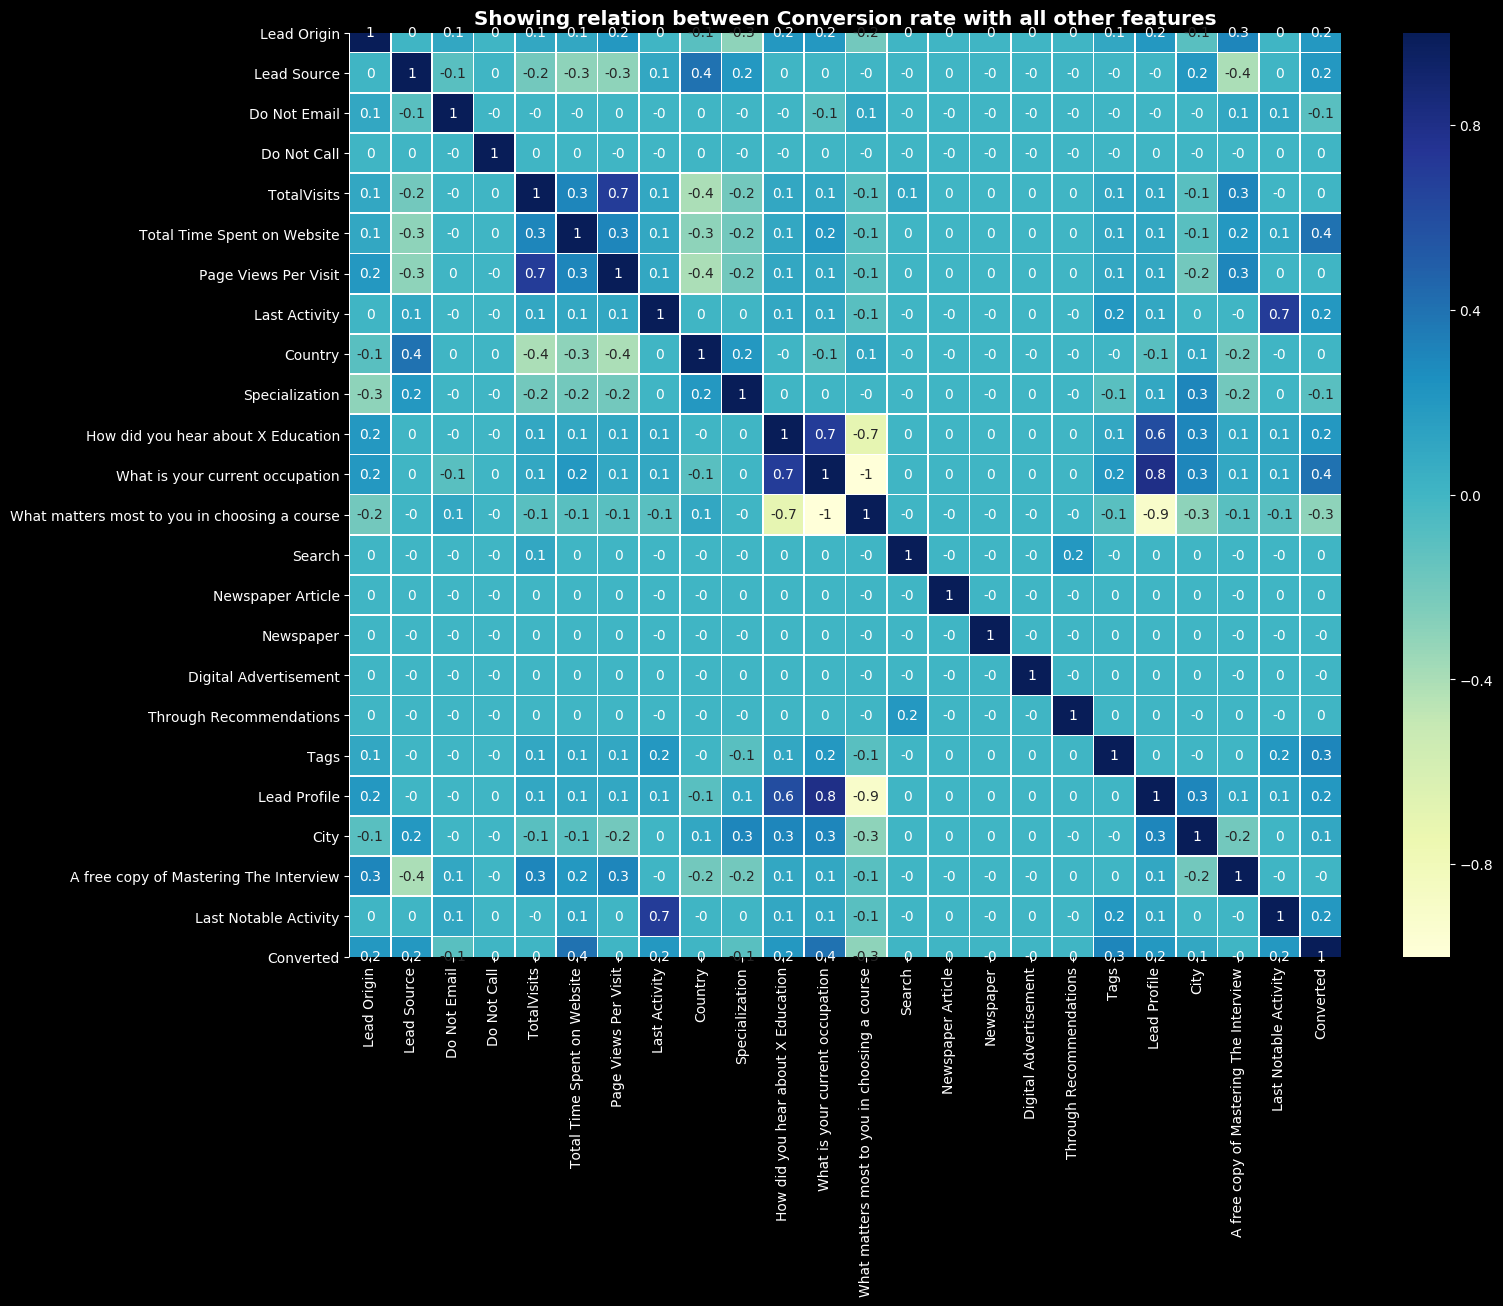

In [475]:
plt.figure(figsize = (16,12))
# sns.heatmap(df_leads.corr())
sns.heatmap(df_leads.corr().round(decimals = 1), annot = True, cmap="YlGnBu", linewidths=.5)
plt.title('Showing relation between Conversion rate with all other features', fontweight='bold')

From the above heatmap, it is evident that
1. Conversion is hugely dependent upon features 
	> A. What is your current Occupation.

	> B. Total Time spent on website

	> C. Tags

2. Whereas the features which are least contributing to the conversion are
	> A. What matters most to you in choosin course.

	> B. Do not email
  

Even above observations are clearly evident in Logistic Regression summary version too. Where the above highly contributing features are having high coefficients such that having very high log Odds to become converted into the program. So, same low log-odds apply for low contributing features too.